In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

In [2]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
data_df = pd.read_csv('./ml-100k/u1.base', sep='\t', names=r_cols,encoding='latin-1')
test_df = pd.read_csv('./ml-100k/u1.test', sep='\t', names=r_cols,encoding='latin-1')


data = data_df.drop(['unix_timestamp'],axis=1).sort_values(['user_id','movie_id']);
test = test_df.drop(['unix_timestamp'],axis=1).sort_values(['user_id','movie_id']);
data.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


In [3]:
# 原始评分矩阵
n_users=data['user_id'].unique().shape[0]
n_items = data['movie_id'].unique().shape[0]
n_users
n_items

n_users_validate=test['user_id'].unique().shape[0]
n_items_validate = test['movie_id'].unique().shape[0]
# n_users
# n_items

copy_data = data.copy() 
copy_test = test.copy()
R_train = copy_data.set_index(['user_id','movie_id'],inplace=True)
R_validate = copy_test.set_index(['user_id','movie_id'],inplace=True)


R_train=copy_data.unstack(level=1)
R_validate=copy_test.unstack(level=1)

R_train=R_train.fillna(0)
R_validate=R_validate.fillna(0)
R_train.shape


# copy_test = test.copy() 
# R_test = copy_test.set_index(['user_id','movie_id'],inplace=True)
# R_test=copy_test.unstack(level=1)
# R_test=R_test.fillna(0)
# R_test.shape



943

1650

(943, 1650)


  $$  R_{(n_users,n_items)}  =  P_{(n_users,K)}\dot Q_{(n_items,K)}^T =  P_{(n_users,K)}\dot Q_{(K,n_items)}$$

In [4]:
K = 10

P =np.random.rand(n_users,K)
Q = np.random.rand(n_items,K)

P = pd.DataFrame(data =P,index=range(1,n_users+1),columns=range(1,K+1))
Q = pd.DataFrame(data =  Q,index=range(1,n_items+1), columns=range(1,K+1))

$u$代表$n\_user$ ,$i$代表$n\_items$
$$ L(P,Q) = \sum_{n=1}^{u}\sum_{n=1}^{i}(R_{u,i}-P_uQ_i)^2+\frac{1}{2}{(P_u^2+Q_i^2)}$$
其中 $\alpha = \lambda = \frac{1}{2}$ 

In [5]:
alpha = 1/10
def loss(R,P,Q,alpha):#alpha 是 实验要给的lambda
    R = np.matrix(R)  # n_users * n_items
    P = np.matrix(P)  # n_users * K
    Q = np.matrix(Q)  # n_items * K
    new_R = P.dot(np.transpose(Q))  
    differ  = R - new_R[0:R.shape[0],0:R.shape[1]]
#     print(new_R[0:R.shape[0],:].shape)
    differ[R==0]=0
    differ
    square_differ_loss = np.multiply(differ,differ).sum()/2
    p =  np.multiply(P,P).sum()
    q =  np.multiply(Q,Q).sum()
    regularizer = alpha*(p+q)

    return (square_differ_loss + regularizer)/(R[R!=0].shape[1])

$$P_u = {(Q_{(k,i)}Q_{(k,i)}^{T}+ \alpha E_k)}^{-1}Q_{(k,i)}R_u  $$


In [6]:
train_loss = []    
test_loss=[]
for i in range(100):
    P= np.linalg.inv(np.transpose(Q).dot(Q)+alpha*(np.eye(K))).dot(np.transpose(Q)).dot(np.transpose(R_train))
    P=np.transpose(P)
    Q=np.linalg.inv(np.transpose(P).dot(P)+alpha*(np.eye(K))).dot(np.transpose(P)).dot(R_train)
    Q=np.transpose(Q)
#     print("")
#     print("Train Loss:  {}".format(loss(R_train,P,Q,alpha)))
#print("Validation Loss: {}".format(loss(R_validate,P,Q,alpha)));        
        
#       print("epoch#:%d ，train_loss: %d ,test_loss: %d",epoch+1,loss(R_train,P,Q,alpha),loss(R_test,P,Q,alpha))
    train_loss.append(loss(R_train,P,Q,alpha))
    test_loss.append(loss(R_validate,P,Q,alpha))
    


Text(0.5,0,'epoch')

Text(0,0.5,'loss')

Text(0.5,1,'Loss of train and validate')

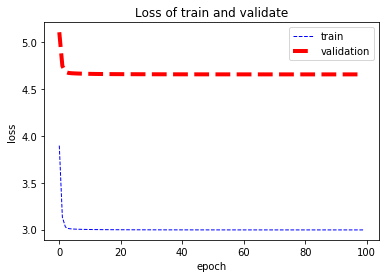

In [7]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title('Loss of train and validate')
plt.plot(train_loss, '--', c='b',linewidth=1, label='train')
plt.plot(test_loss, '--', c='r',linewidth=4, label='validation')
plt.legend()
# plt.savefig('ALS-losses.png')
plt.show()